# Financial Time-Series Forecasting using Neural Networks

Diego Pintor Ochoa \
September 2022 \
dpintor1997@gmail.com


## Introduction

The purpose of this work is to show case the usage of Neural Networks to forecast the future behaviour of financial time series, and compare it to the results obtained using benchmark models to perform the same analyisis, such as ARIMA or GARCH models.

[What is a Neural Network]

[Why it is important to forecast financial time series]

[What's the difference between the benchamrk models and the Neural Networks]

[On which data is the forecasting going to be implemented]


## Analysing the data

Data to be forecasted on:
- IPC (Índice de Precios y Cotizaciones)
- S&P 500
- USD/MXN
- AMAZON

In [1]:
# Importing the data
import pandas as pd
ipc_data_raw = pd.read_excel('Files/IPC.xlsx')
spy_data_raw = pd.read_excel('Files/SPY.xlsx')
amzn_data_raw = pd.read_excel('Files/AMZN.xlsx')
usdmxn_data_raw = pd.read_excel('Files/USDMXN.xlsx')

In [2]:
# exploring the data

ipc_data_raw

,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol
0,NaT,NaN,45180,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-26,45225.0,45180,-472.0,-1.033909,45070.0,45225.0,15016.0,556.0
2,2022-09-23,45625.0,45652,-799.0,-1.720092,45625.0,45795.0,15077.0,701.0
3,2022-09-22,46451.0,46451,-1042.0,-2.194008,46210.0,46525.0,15508.0,1415.0
4,2022-09-21,47475.0,47493,-62.0,-0.130375,47350.0,47520.0,15141.0,403.0
...,...,...,...,...,...,...,...,...,...
183,2022-01-06,53535.0,53457,67.0,0.125492,53410.0,53540.0,13699.0,1372.0
184,2022-01-05,53355.0,53390,-215.0,-0.401082,53355.0,53445.0,13181.0,859.0
185,2022-01-04,53600.0,53605,27.0,0.050394,53560.0,53600.0,12760.0,880.0
186,2022-01-03,53490.0,53578,-184.0,-0.342249,53485.0,53665.0,12110.0,516.0


The data follows the same structure for all files, and the only relevant variable is going to be the settlement price, so, for all data, we will be dropping all variables except Settlement Price and Date.

In [2]:
ipc_data = ipc_data_raw[['Date', 'Settlement Price']].dropna()
ipc_data.index = ipc_data['Date']
ipc_data.drop(columns=['Date'], inplace=True)
ipc_data.head()

,Settlement Price
Date,
2022-09-26,45180
2022-09-23,45652
2022-09-22,46451
2022-09-21,47493
2022-09-20,47555


In [3]:
spy_data = spy_data_raw[['Date', 'Price']].dropna()
spy_data.index = spy_data['Date']
spy_data.drop(columns=['Date'], inplace=True)
spy_data.head()

,Price
Date,
2022-09-27,3647.290000
2022-09-26,3655.042215
2022-09-23,3693.233529
2022-09-22,3757.991178
2022-09-21,3789.932741


In [4]:
amzn_data = amzn_data_raw[['Date', 'Price']].dropna()
amzn_data.index = amzn_data['Date']
amzn_data.drop(columns=['Date'], inplace=True)
amzn_data.head()

,Price
Date,
2022-09-26,115.15
2022-09-23,113.78
2022-09-22,117.31
2022-09-21,118.54
2022-09-20,122.19


In [5]:
usdmxn_data = usdmxn_data_raw[['Date', 'Mid']].dropna()
usdmxn_data.index = usdmxn_data['Date']
usdmxn_data.drop(columns=['Date'], inplace=True)
usdmxn_data.head()

,Mid
Date,
2022-09-27,20.3215
2022-09-26,20.3370
2022-09-23,20.1555
2022-09-22,19.9755
2022-09-21,20.0055


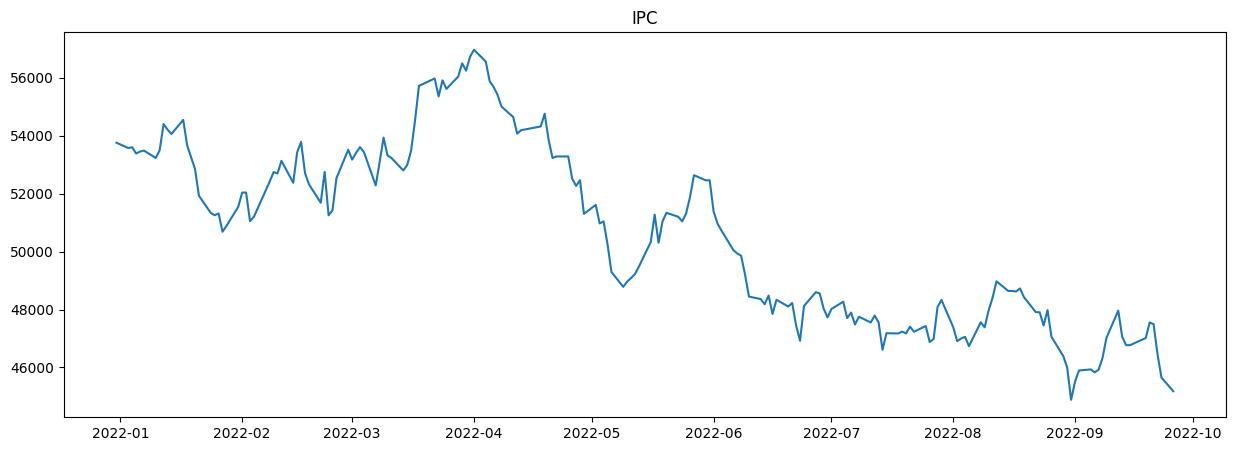

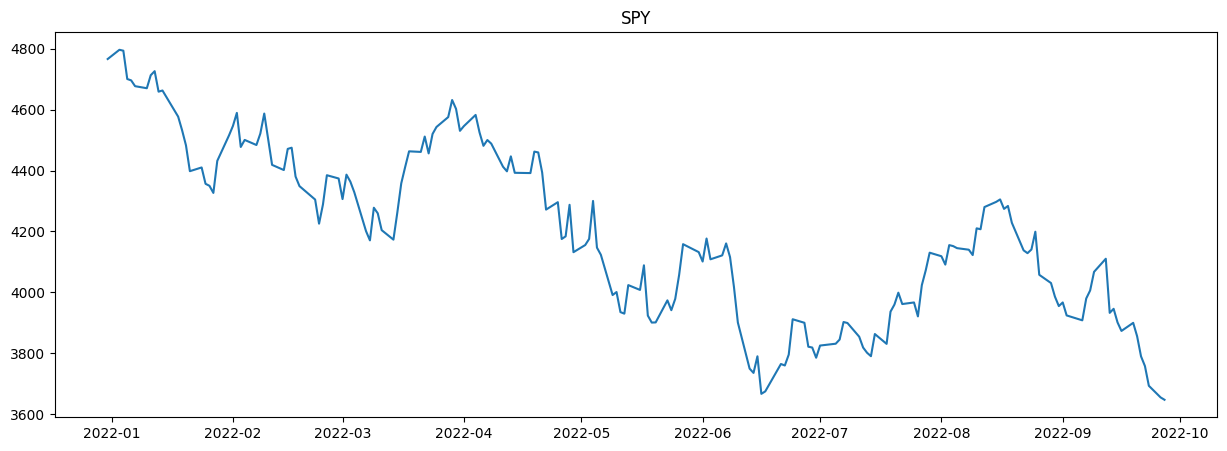

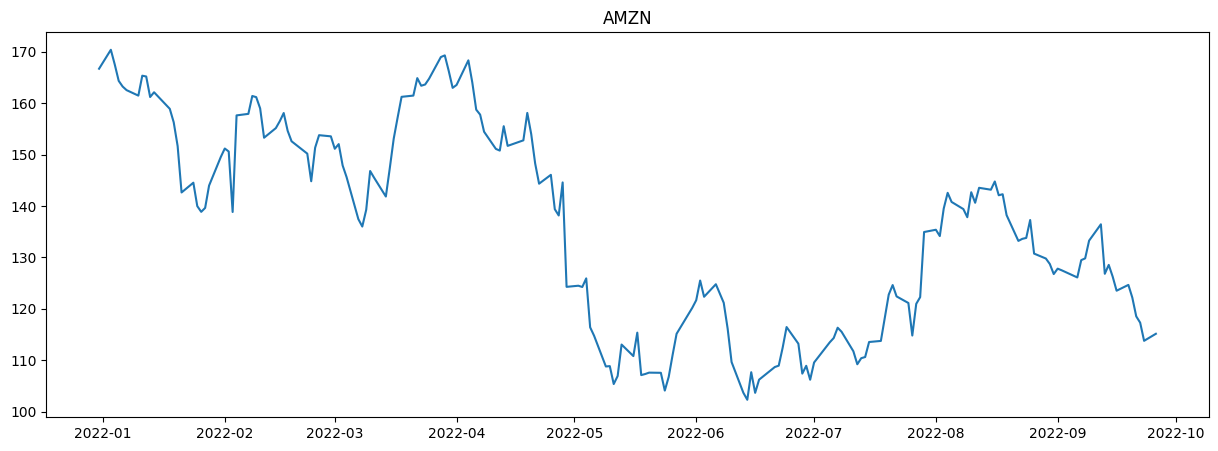

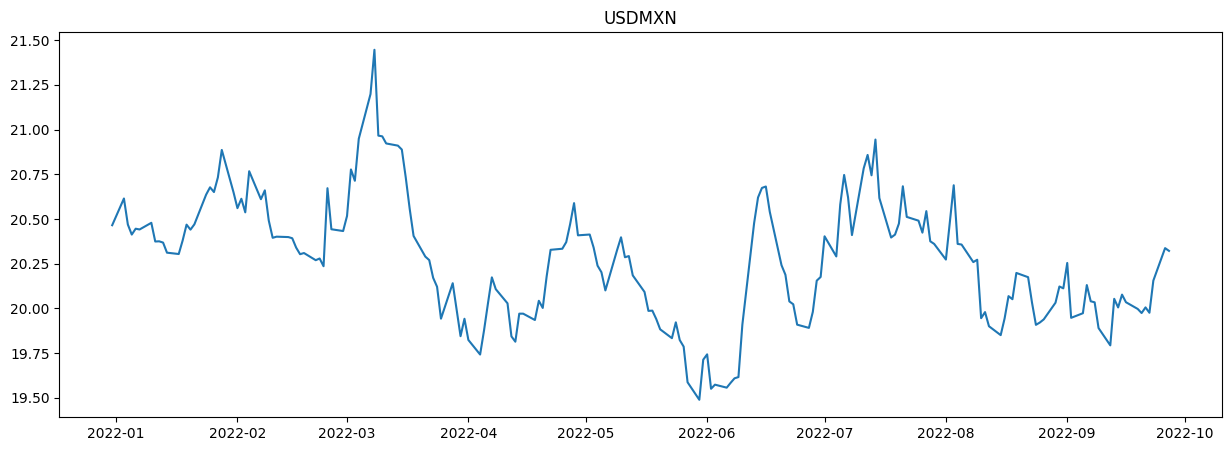

In [6]:
# Plot price data
import matplotlib.pyplot as plt
data = [ipc_data, spy_data, amzn_data, usdmxn_data]
data_titles = ['IPC', 'SPY', 'AMZN', 'USDMXN']
for i in range(len(data)):
    plt.figure(figsize=(15,5))
    plt.plot(data[i])
    plt.title(data_titles[i])

## Benchmark Models
For this forecasting purposes, the benchamrk models to be used will be ARIMA models, obtained through the autoarima process.

In [8]:
# ARIMA model
# For this model we will be using the pmdarima library
import pmdarima as pm
from pmdarima import model_selection
import numpy as np


In [7]:
# Separating the data into train and test sets
train = []
test = []
for i in data:
    trainIndex = int(len(i)*0.8)
    train.append(i[:trainIndex])
    test.append(i[trainIndex:])


In [10]:
# Finding best ARIMA models for each time series
arima_models = []
for i in range(len(data)):
    arima_models.append(pm.auto_arima(train[i], error_action='ignore', trace=True, 
                          suppress_warnings=True, maxiter = 5, seasonal=False))
    

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2293.519, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2287.623, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2287.533, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2287.772, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2286.519, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2288.217, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.185 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1648.488, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1640.232, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1642.224, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1642.260, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1639.155, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1644.036, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]         

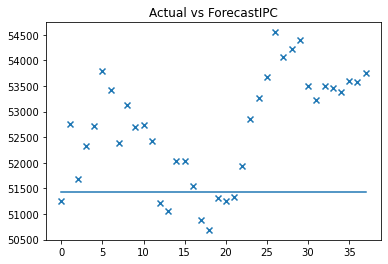

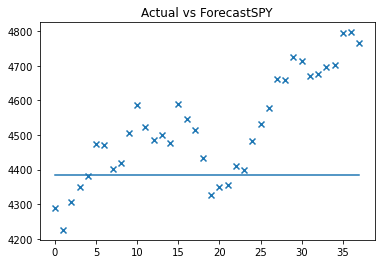

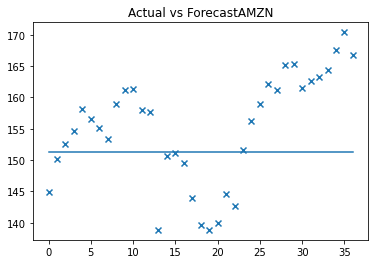

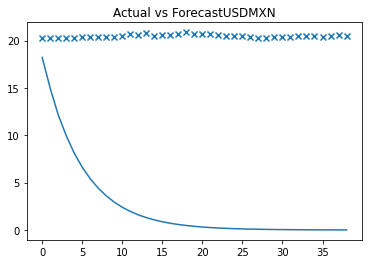

In [11]:
# Actual vs test forecast
for i in range(len(data)):
    plt.figure()
    x = np.arange(test[i].shape[0])
    plt.scatter(x, test[i], marker='x')
    plt.plot(x, arima_models[i].predict(n_periods= test[i].shape[0]))
    plt.title('Actual vs Forecast'+data_titles[i])


In [8]:
# Aight, fuck GARCH then, lets do NN
import tensorflow as tf


In [9]:
# Normalizing the data
train_mean = [i.mean() for i in train]
train_std = [i.std() for i in train]
norm_train = [(i - train_mean[j])/train_std[j] for j, i in enumerate(train)]


